# Title: IP Explorer
&lt;details&gt;
    <summary> <u>Details...</u></summary>
    
**Notebook Version:** 1.0<br>
**Python Version:** Python 3.7 (including Python 3.6 - AzureML)<br>
**Required Packages**: kqlmagic, msticpy, pandas, numpy, matplotlib, networkx, ipywidgets, ipython, scikit_learn, dnspython, ipwhois, folium, holoviews<br>
**Platforms Supported**:
- Azure Notebooks Free Compute
- Azure Notebooks DSVM
- OS Independent

**Data Sources Required**:
- Log Analytics 
    - Heartbeat
    - SecurityAlert
    - SecurityEvent
    - AzureNetworkAnalytics_CL
    
- (Optional)  
    - VirusTotal (with API key)
    - Alienvault OTX (with API key) 
    - IBM Xforce (with API key) 
    - CommonSecurityLog
&lt;/details&gt;


Brings together a series of queries and visualizations to help you assess the security state of an IP address. It works with both internal addresses and public addresses. 
<br> For internal addresses it focuses on traffic patterns and behavior of the host using that IP address. For public IPs it lets you perform threat intelligence lookups, passive dns, whois and other checks. 
<br>It also allows you to examine any network traffic between the external IP address and your resources.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a><span class="toc-item-num">1  </span>Hunting Hypothesis</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.1  </span>IP Explorer Mindmap</a></span></li></ul></li><li><span><a><span class="toc-item-num">2  </span>Notebook Initialization</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">2.1  </span>Get WorkspaceId and Authenticate to Log Analytics</a></span></li></ul></li><li><span><a><span class="toc-item-num">3  </span>Enter the IP Address and query time window</a></span></li><li><span><a><span class="toc-item-num">4  </span>Detemine IP Address Type</a></span></li><li><span><a><span class="toc-item-num">5  </span>Internal IP Address</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">5.1  </span>Data Sources available to query related to IP</a></span></li><li><span><a><span class="toc-item-num">5.2  </span>Check if IP is assigned to multiple hostnames</a></span></li><li><span><a><span class="toc-item-num">5.3  </span>System Info</a></span></li><li><span><a><span class="toc-item-num">5.4  </span>ServiceMap - Get List of Services for Host</a></span></li></ul></li><li><span><a><span class="toc-item-num">6  </span>External IP</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">6.1  </span>GeoIP Lookups for External IP Addresses</a></span></li><li><span><a><span class="toc-item-num">6.2  </span>Whois Registrars for External IP Addresses</a></span></li><li><span><a><span class="toc-item-num">6.3  </span>Opensource and Azure Sentinel ThreatIntel Lookups</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">6.3.1  </span>Configure your TI Provider settings</a></span></li></ul></li><li><span><a><span class="toc-item-num">6.4  </span>Passive DNS lookups for External IP Addresses</a></span></li></ul></li><li><span><a><span class="toc-item-num">7  </span>Related Alerts</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">7.1  </span>Visualization - Timeline of Related Alerts</a></span></li><li><span><a><span class="toc-item-num">7.2  </span>Browse List of Related Alerts</a></span></li></ul></li><li><span><a><span class="toc-item-num">8  </span>Related Hosts</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">8.1  </span>Visualization - Networkx Graph</a></span></li></ul></li><li><span><a><span class="toc-item-num">9  </span>Related Accounts</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">9.1  </span>Visualization - Networkx Graph</a></span></li></ul></li><li><span><a><span class="toc-item-num">10  </span>Logon Summary for Related Entities</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">10.1  </span>HeatMap for Weekly failed logons</a></span></li><li><span><a><span class="toc-item-num">10.2  </span>Host Logons Timeline</a></span></li><li><span><a><span class="toc-item-num">10.3  </span>Failed Logons Timeline</a></span></li></ul></li><li><span><a><span class="toc-item-num">11  </span>Network Connection Analysis</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">11.1  </span>Network Check Communications with Other Hosts</a></span></li><li><span><a><span class="toc-item-num">11.2  </span>Query Flows by IP Address</a></span></li><li><span><a><span class="toc-item-num">11.3  </span>Choose ASNs/IPs to Check for Threat Intel Reports</a></span></li><li><span><a><span class="toc-item-num">11.4  </span>GeoIP Map of External IPs</a></span></li><li><span><a><span class="toc-item-num">11.5  </span>Outbound Data transfer Time Series Anomalies</a></span></li></ul></li><li><span><a><span class="toc-item-num">12  </span>Conclusion</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">12.1  </span>List of Suspicious Activities/ Observables/Hunting bookmarks</a></span></li></ul></li><li><span><a><span class="toc-item-num">13  </span>Appendices</a></span></li><li><span><a><span class="toc-item-num">14  </span>Available DataFrames</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">14.1  </span>Saving Data to Excel</a></span></li></ul></li><li><span><a><span class="toc-item-num">15  </span>Setup Cell</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">15.1  </span><code>msticpyconfig.yaml</code> configuration File</a></span></li></ul></li></ul></div>

<a></a>[Contents](#toc)
## Hunting Hypothesis
Our broad initial hunting hypothesis is that a we have received IP address entity which is suspected to be compromized internal host or external public address to whom internal hosts are communicating in malicious manner, we will need to hunt from a range of different positions to validate or disprove this hypothesis.

Before you start hunting please run the cells in <a>Setup</a> at the bottom of this Notebook.

<a></a>[Contents](#toc)
### IP Explorer Mindmap
Below mindmap diagram shows hunting workflow depending upon the type of IP address provided

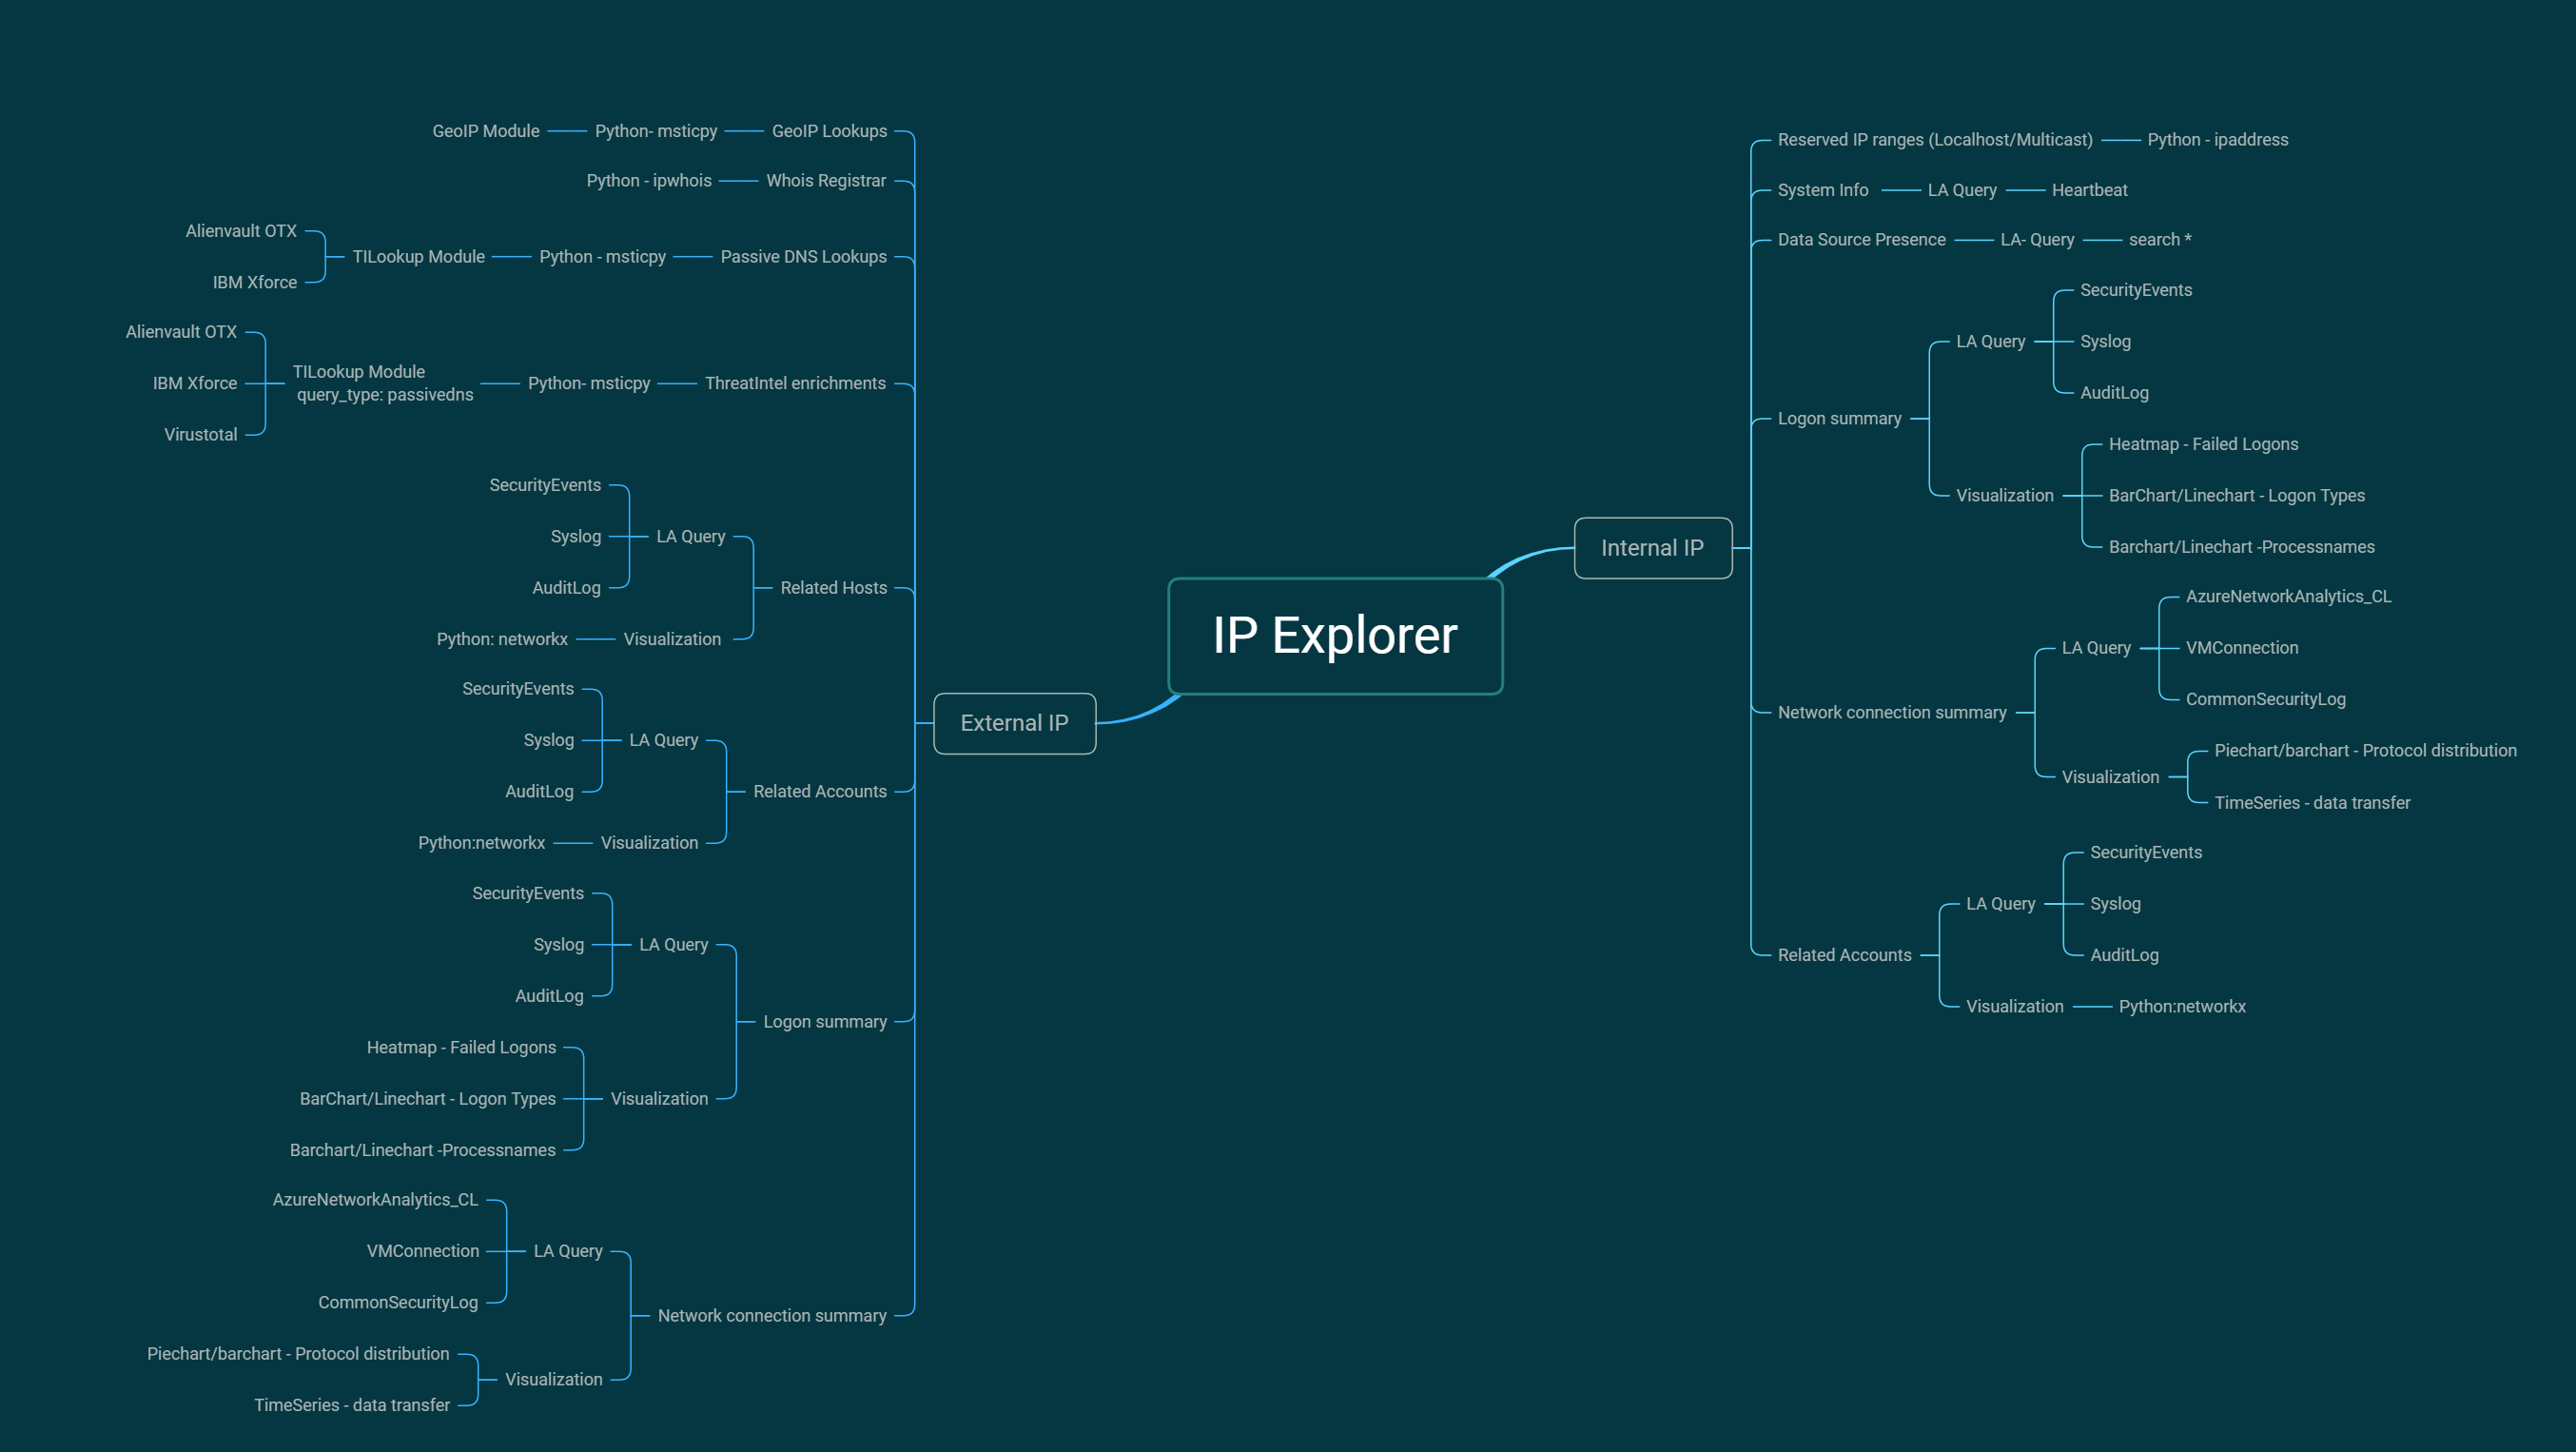

<a></a>[Contents](#toc)
## Notebook Initialization
&lt;details&gt;
    <summary> <u>More Details...</u></summary>
        If this is your first time running this Notebook please run the cells in the <a>Setup</a> section before proceeding  to ensure you have the required packages installed correctly. Similarly if you see any import failures (```ImportError```) in the notebook, please make sure that you have run the <a>Setup</a> section first.
&lt;/details&gt;

In [5]:
# Imports
import sys
import warnings

from msticpy.nbtools.utility import check_py_version

MIN_REQ_PYTHON = (3, 6)
check_py_version(MIN_REQ_PYTHON)

from IPython import get_ipython
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#setting pandas display options for dataframe
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 100)

import re
import ipaddress as ip
import urllib.request
import json
import requests
from pathlib import Path
from pyvis.network import Network
import networkx as nx

# msticpy imports
from msticpy.data import QueryProvider
from msticpy.nbtools.entityschema import IpAddress, GeoLocation
from msticpy.nbtools import *
from msticpy.sectools import *
from msticpy.sectools.ip_utils import create_ip_record, get_ip_type, get_whois_info
from msticpy.nbtools.foliummap import FoliumMap
from msticpy.nbtools.utility import md, md_warn, check_and_install_missing_packages
from msticpy.nbtools.wsconfig import WorkspaceConfig

WIDGET_DEFAULTS = {
    "layout": widgets.Layout(width="95%"),
    "style": {"description_width": "initial"},
}

# Some of our dependencies (networkx) still use deprecated Matplotlib
# APIs - we can't do anything about it so suppress them from view
from matplotlib import MatplotlibDeprecationWarning

warnings.simplefilter("ignore", category=MatplotlibDeprecationWarning)

ws_config = WorkspaceConfig()

<a></a>[Contents](#toc)
### Get WorkspaceId and Authenticate to Log Analytics 
&lt;details&gt;
    <summary> <u>Details...</u></summary>
If you are using user/device authentication, run the following cell. 
- Click the 'Copy code to clipboard and authenticate' button.
- This will pop up an Azure Active Directory authentication dialog (in a new tab or browser window). The device code will have been copied to the clipboard. 
- Select the text box and paste (Ctrl-V/Cmd-V) the copied value. 
- You should then be redirected to a user authentication page where you should authenticate with a user account that has permission to query your Log Analytics workspace.

Use the following syntax if you are authenticating using an Azure Active Directory AppId and Secret:
```
%kql loganalytics://tenant(aad_tenant).workspace(WORKSPACE_ID).clientid(client_id).clientsecret(client_secret)
```
instead of
```
%kql loganalytics://code().workspace(WORKSPACE_ID)
```

Note: you may occasionally see a JavaScript error displayed at the end of the authentication - you can safely ignore this.<br>
On successful authentication you should see a ```popup schema``` button.
To find your Workspace Id go to [Log Analytics](https://ms.portal.azure.com/#blade/HubsExtension/Resources/resourceType/Microsoft.OperationalInsights%2Fworkspaces). Look at the workspace properties to find the ID.
&lt;/details&gt;

In [6]:
# Authentication
qry_prov = QueryProvider(data_environment="LogAnalytics")
qry_prov.connect(connection_str=ws_config.code_connect_str)
table_index = qry_prov.schema_tables

<a></a>[Contents](#toc)
## Enter the IP Address and query time window

Type the IP address you want to search for and the time bounds over which search.

You can specify the IP address value in the widget e.g. 192.168.1.1

In [7]:
ipaddr_text = widgets.Text(
    description="Enter the IP Address to search for:", **WIDGET_DEFAULTS
)
display(ipaddr_text)

Text(value='', description='Enter the IP Address to search for:', layout=Layout(width='95%'), style=Descriptio…

In [8]:
query_times = nbwidgets.QueryTime(units="day", max_before=20, before=5, max_after=7)
query_times.display()

HTML(value='<h4>Set query time boundaries</h4>')

In [9]:
# Set up function to allow easy reference to common parameters for queries throughout the notebook
def ipaddr_query_params():
    return {
        "start": query_times.start,
        "end": query_times.end,
        "ip_address": ipaddr_text.value
    }

<a></a>[Contents](#toc)
## Detemine IP Address Type

In [15]:
ipaddr_type = get_ip_type(ipaddr_query_params()['ip_address'])

#TO DO - mention heatrtbeat table presence. explain what internal means ? 
md(f'Depending on the IP Address origin, different sections of this notebook are applicable', styles=["bold", "large"])
md(f'Please follow either the Interal IP Address or External IP Address sections', styles=["bold"])

#Get details from Heartbeat table for the given IP Address and Time Parameters
heartbeat_df = qry_prov.Heartbeat.get_info_by_ipaddress(**ipaddr_query_params())

# Set hostnames retrived from Heartbeat table if available
if not heartbeat_df.empty:
    hostname = heartbeat_df["Computer"][0]
else:
    hostname = ""
    
if not heartbeat_df.empty:
    ipaddr_origin = "Internal"
    md(f'IP Address IP Address type: {ipaddr_type}', styles=["blue","bold"])
    md(f'Go to section [InternalIP](#goto_internalIP)', "bold, blue, large")
else:
    ipaddr_type = "External"
    md(f'IP Address type: {ipaddr_type}', styles=["orange","bold"])
    md('Go to section: [ExternalIP](#goto_externalIP)', styles=["blue","bold"])
    
#Populate related IP addresses for the calculated hostname
az_net_df = None
if "AzureNetworkAnalytics_CL" in table_index:
    aznet_query = f"""AzureNetworkAnalytics_CL | where ResourceType == 'NetworkInterface' | where SubType_s == "Topology" | search \'{ipaddr_text.value}\' | where TimeGenerated >= datetime({query_times.start}) | where TimeGenerated <= datetime({query_times.end}) | where VirtualMachine_s has '{hostname}' | top 1 by TimeGenerated desc | project PrivateIPAddresses = PrivateIPAddresses_s, PublicIPAddresses = PublicIPAddresses_s"""
    az_net_df = qry_prov.exec_query(query=aznet_query)
    
#Create IP Entity record using available dataframes
if az_net_df.empty and heartbeat_df.empty:
    md_warn('No Heartbeat Data and Network topology data found')
elif not heartbeat_df.empty:
    if az_net_df.empty:
        ip_entity = create_ip_record(
            heartbeat_df=heartbeat_df)
    else:
        ip_entity = create_ip_record(
            heartbeat_df=heartbeat_df, az_net_df=az_net_df)
    #Display IP Entity
    md("Displaying IP Entity", styles=["green","bold"])
    print(ip_entity)

<p style="font-weight: bold; font-size: 130%;">Depending on the IP Address origin, different sections of this notebook are applicable</p>

<p style="font-weight: bold;">Please follow either the Interal IP Address or External IP Address sections</p>

<p style="color: blue; font-weight: bold;">IP Address IP Address type: Public</p>

<p style="font-weight: bold; color: blue; font-size: 130%;">Go to section [InternalIP](#goto_internalIP)</p>

<p style="color: green; font-weight: bold;">Displaying IP Entity</p>

{ 'AdditionalData': {},
  'Address': '40.76.43.124',
  'ComputerEnvironment': 'Azure',
  'Location': { 'AdditionalData': {},
                'CountryName': 'United States',
                'Latitude': 38.71,
                'Longitude': -78.16,
                'Type': 'geolocation'},
  'OSName': '',
  'OSType': 'Windows',
  'OSVMajorersion': '10',
  'OSVMinorVersion': '0',
  'OmsSolutions': [ '"security"',
                    '"changeTracking"',
                    '"dnsAnalytics"',
                    '"securityCenterFree"',
                    '"securityInsights"',
                    '"windowsEventForwarding"'],
  'SourceComputerId': '263a788b-6526-4cdc-8ed9-d79402fe4aa0',
  'SubscriptionId': '40dcc8bf-0478-4f3b-b275-ed0a94f2c013',
  'Type': 'ipaddress',
  'VMUUID': '3b8d40a2-33fa-4230-9dc1-794aabdd225c',
  'hostname': 'MSTICAlertsWin1',
  'private_ips': [IpAddress(Type=ipaddress, Address=10.0.3.5)],
  'public_ips': [ IpAddress(Type=ipaddress, Address=40.76.43.124, Location={ 'Addit

<a></a>
## Internal IP Address

<a></a>[Contents](#toc)
### Data Sources available to query related to IP

In [16]:
# KQL query for full text search of IP address and display all datatypes populated for the time period
datasource_status = """
search \'{ip_address}\' or \'{hostname}\'
| where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
| summarize RowCount=count() by Table=$table
""".format(
    **ipaddr_query_params(), hostname=hostname
)
%kql -query datasource_status
datasource_status_df = _kql_raw_result_.to_dataframe()

# Display result as transposed matrix of datatypes availabel to query for the query period
if not datasource_status_df.empty:
    available_datasets = datasource_status_df['Table'].values
    md("Datasources available to query for IP ::", styles=["green","bold"])
    display(datasource_status_df)
else:
    md("No datasources available to query for the query period", styles=["red","bold"])

<p style="color: green; font-weight: bold;">Datasources available to query for IP ::</p>

Table  RowCount
0          SecurityDetection       100
1        ConfigurationChange       571
2    SecurityBaselineSummary        16
3              UpdateSummary        36
4          ConfigurationData      3845
5           ProtectionStatus       198
6              SecurityAlert       123
7                     Update       344
8                  Heartbeat     13708
9           SecurityBaseline      3648
10             AzureActivity       354
11             SecurityEvent     65893
12               AuditLog_CL         1
13  AzureNetworkAnalytics_CL   1306040

<a></a>[Contents](#toc)
### Check if IP is assigned to multiple hostnames

In [20]:
# Get single event - try process creation
if ip_entity['OSType'] =='Windows':
    if "SecurityEvent" not in available_datasets:
        raise ValueError("No Windows event log data available in the workspace")
    host_name = None
    matching_hosts_df = qry_prov.WindowsSecurity.list_host_processes(
        query_times, host_name=hostname, add_query_items="| distinct Computer"
    )
elif ip_entity['OSType'] =='Linux':
    if "Syslog" not in available_datasets:
        raise ValueError("No Linux syslog data available in the workspace")
    else:
        linux_syslog_query = f""" Syslog | where TimeGenerated >= datetime({query_times.start}) | where TimeGenerated <= datetime({query_times.end}) | where HostIP == '{ipaddr_text.value}' | distinct Computer """
        matching_hosts_df = qry_prov.exec_query(query=linux_syslog_query)
        
if len(matching_hosts_df) > 1:
    print(f"Multiple matches for '{hostname}'. Please select a host from the list.")
    choose_host = nbwidgets.SelectString(
        item_list=list(matching_hosts_df["Computer"].values),
        description="Select the host.",
        auto_display=True,
    )
elif not matching_hosts_df.empty:
    host_name = matching_hosts_df["Computer"].iloc[0]
    print(f"Unique host found for IP: {hostname}")

Unique host found for IP: MSTICAlertsWin1


<a></a>[Contents](#toc)
### System Info

In [21]:
#TODO - strip the output to certain columns
# Retrieving System info from internal table if IP address is not Public
if ipaddr_origin == "Internal":
    md(
            'System Info retrieved from Heartbeat table ::', styles=["green","bold"]
        )
    display(heartbeat_df.T)
else:
        md_warn(
            'No records available in HeartBeat table'
        )

<p style="color: green; font-weight: bold;">System Info retrieved from Heartbeat table ::</p>

0
TimeGenerated                                                                                 2019-02-17 18:33:16.467000
Computer                                                                                                 MSTICAlertsWin1
ComputerIP                                                                                                  40.76.43.124
ComputerEnvironment                                                                                                Azure
SubscriptionId                                                                      40dcc8bf-0478-4f3b-b275-ed0a94f2c013
ResourceType                                                                                             virtualMachines
OSType                                                                                                           Windows
OSName                                                                                                                  
OSMajorVersion                                                                                                        10
OSMinorVersion                                                                                                         0
RemoteIPCountry                                                                                            United States
RemoteIPLatitude                                                                                                   38.71
RemoteIPLongitude                                                                                                 -78.16
Solutions            "security", "changeTracking", "dnsAnalytics", "securityCenterFree", "securityInsights", "windows...
SourceComputerId                                                                    263a788b-6526-4cdc-8ed9-d79402fe4aa0
VMUUID                                                                              3b8d40a2-33fa-4230-9dc1-794aabdd225c

[Contents](#toc)
### ServiceMap - Get List of Services for Host

In [25]:
if "ServiceMapProcess_CL" not in available_datasets:
        md_warn("ServiceMap data is not enabled")
        md(
            f"Enable ServiceMap Solution from Azure marketplce: <br>"
            +"https://docs.microsoft.com/en-us/azure/azure-monitor/insights/service-map#enable-service-map",
            styles=["bold"]
        )

else:
    servicemap_proc_query = """
    ServiceMapProcess_CL
    | where Computer == \'{hostname}\'
    | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
    | project Computer, Services_s, DisplayName_s, ExecutableName_s , ExecutablePath_s 
        """.format(
        hostname=hostname, **ipaddr_query_params()
    )

    %kql -query servicemap_proc_query
    servicemap_proc_df = _kql_raw_result_.to_dataframe()
    display(servicemap_proc_df)

<p style="font-weight: bold; color: red; font-size: 130%;">Warning: ServiceMap data is not enabled</p>

<p style="font-weight: bold;">Enable ServiceMap Solution from Azure marketplce: <br>https://docs.microsoft.com/en-us/azure/azure-monitor/insights/service-map#enable-service-map</p>

<a></a>
## External IP

<a></a>[Contents](#toc)
### GeoIP Lookups for External IP Addresses

In [28]:
# msticpy- geoip module to retrieving Geo Location for Public IP addresses
if ipaddr_type == "Public" or ipaddr_type == "External" :
    iplocation = GeoLiteLookup()

    loc_results, ext_ip_entity = iplocation.lookup_ip(ip_address=ipaddr_query_params()['ip_address'])
    md(
            'Geo Location for the IP Address ::', styles=["bold","green"]
        )
    print(ext_ip_entity[0])
else:
    md('IP address type is {ipaddr_type}', styles=["bold","orange"])

<p style="font-weight: bold; color: green;">Geo Location for the IP Address ::</p>

{ 'AdditionalData': {},
  'Address': '40.76.43.124',
  'Location': { 'AdditionalData': {},
                'City': 'Washington',
                'CountryCode': 'US',
                'CountryName': 'United States',
                'Latitude': 38.7095,
                'Longitude': -78.1539,
                'State': 'Virginia',
                'Type': 'geolocation'},
  'Type': 'ipaddress'}


<a></a>[Contents](#toc)
### Whois Registrars for External IP Addresses

In [30]:
# ipwhois module to retrieve whois registrar for Public IP addresses
if ipaddr_type == "Public" or ipaddr_type == "External" :
    from ipwhois import IPWhois

    whois = IPWhois(ipaddr_query_params()['ip_address'])
    whois_result = whois.lookup_whois()
    if whois_result:
        md(f'Whois Registrar Info ::', styles=["bold","green"])
        display(whois_result)
    else:
        md(
                f'No whois records available', styles=["bold","orange"]
            )
else:
    md('IP address type is {ipaddr_type}', styles=["bold","orange"])

<p style="font-weight: bold; color: green;">Whois Registrar Info ::</p>

{'nir': None,
 'asn_registry': 'arin',
 'asn': '8075',
 'asn_cidr': '40.64.0.0/10',
 'asn_country_code': 'US',
 'asn_date': '2015-02-23',
 'asn_description': 'MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corporation, US',
 'query': '40.76.43.124',
 'nets': [{'cidr': '40.112.0.0/13, 40.124.0.0/16, 40.96.0.0/12, 40.76.0.0/14, 40.80.0.0/12, 40.74.0.0/15, 40.120.0.0/14, 40.125.0.0/17',
   'name': 'MSFT',
   'handle': 'NET-40-74-0-0-1',
   'range': '40.74.0.0 - 40.125.127.255',
   'description': 'Microsoft Corporation',
   'country': 'US',
   'state': 'WA',
   'city': 'Redmond',
   'address': 'One Microsoft Way',
   'postal_code': '98052',
   'emails': ['msndcc@microsoft.com',
    'IOC@microsoft.com',
    'abuse@microsoft.com'],
   'created': '2015-02-23',
   'updated': '2015-05-27'}],
 'raw': None,
 'referral': None,
 'raw_referral': None}

<a></a>[Contents](#toc)
### Opensource and Azure Sentinel ThreatIntel Lookups

#### Configure your TI Provider settings
If you have not used threat intelligence lookups before you will need to supply API keys for the 
TI Providers that you want to use. Please see the section on configuring [msticpyconfig.yaml](#msticpyconfig.yaml-configuration-File)

Then reload provider settings:
```
mylookup = TILookup()
mylookup.reload_provider_settings()
```

In [31]:
if ipaddr_type == "Public" or ipaddr_type == "External" :
    pkg_config.settings
    mylookup = TILookup()
    mylookup.loaded_providers
    resp = mylookup.lookup_ioc(observable=ipaddr_query_params()['ip_address'], ioc_type="ipv4")
    md(f'ThreatIntel Lookup for IP ::', styles=["bold","green"])
    display(mylookup.result_to_df(resp).T)
else:
    md('IP address type is {ipaddr_type}', styles=["bold","orange"])

<p style="font-weight: bold; color: green;">ThreatIntel Lookup for IP ::</p>

OTX  \
Ioc                                                                                                  40.76.43.124   
IocType                                                                                                      ipv4   
QuerySubtype                                                                                                 None   
Provider                                                                                                      OTX   
Result                                                                                                       True   
Severity                                                                                                        0   
Details       {'pulse_count': 0, 'sections_available': ['general', 'geo', 'reputation', 'url_list', 'passive_d...   
RawResult     {'sections': ['general', 'geo', 'reputation', 'url_list', 'passive_dns', 'malware', 'nids_list',...   
Reference                                  https://otx.alienvault.com/api/v1/indicators/IPv4/40.76.43.124/general   
Status                                                                                                          0   

                                                                                                       VirusTotal  \
Ioc                                                                                                  40.76.43.124   
IocType                                                                                                      ipv4   
QuerySubtype                                                                                                 None   
Provider                                                                                               VirusTotal   
Result                                                                                                       True   
Severity                                                                                                        0   
Details         {'verbose_msg': 'IP address in dataset', 'response_code': 1, 'detected_urls': [], 'positives': 0}   
RawResult     {'country': 'US', 'response_code': 1, 'detected_urls': [], 'resolutions': [], 'verbose_msg': 'IP...   
Reference                                                   https://www.virustotal.com/vtapi/v2/ip-address/report   
Status                                                                                                          0   

                                                            XForce  \
Ioc                                                   40.76.43.124   
IocType                                                       ipv4   
QuerySubtype                                                  None   
Provider                                                    XForce   
Result                                                       False   
Severity                                                         0   
Details       Authorization failed. Check account and key details.   
RawResult                                         <Response [401]>   
Reference         https://api.xforce.ibmcloud.com/ipr/40.76.43.124   
Status                                                         401   

                     AzSTI  
Ioc           40.76.43.124  
IocType               ipv4  
QuerySubtype          None  
Provider             AzSTI  
Result               False  
Severity                 0  
Details         Not found.  
RawResult             None  
Reference             None  
Status                   0

<a></a>[Contents](#toc)
### Passive DNS lookups for External IP Addresses

In [32]:
if ipaddr_type == "Public" or ipaddr_type == "External" :
    # retrieve passive dns from TI Providers
    pdns = mylookup.lookup_ioc(
        observable=ipaddr_query_params()['ip_address'],
        ioc_type="ipv4",
        ioc_query_type="passivedns",
        providers=["XForce"],
    )
    pdns_df = mylookup.result_to_df(pdns)
    if not pdns_df.empty and pdns_df["RawResult"][0] and "RDNS" in pdns_df["RawResult"][0]:
        pdnsdomains = pdns_df["RawResult"][0]["RDNS"]
        md(
                'Passive DNS domains for IP: {pdnsdomains}',styles=["bold","green"]
            )
        display(mylookup.result_to_df(pdns).T)
    else:
        md(
                'No passive domains found from the providers', styles=["bold","orange"]
            )
else:
    md('Not an ExternalIP', styles=["bold","red"])

<p style="font-weight: bold;">No passive domains found from the providers</p>

## Related Alerts

In [34]:
ra_query_times = nbwidgets.QueryTime(
    units="day",
    origin_time=query_times.origin_time,
    max_before=28,
    max_after=5,
    before=5,
    auto_display=True,
)


HTML(value='<h4>Set query time boundaries</h4>')

### Visualization - Timeline of Related Alerts

In [35]:
#TODO - testing the alerts query - ASC schema 
# include bookmar/other relevant tables.
related_alerts = qry_prov.SecurityAlert.list_related_alerts(
    ra_query_times, host_name=hostname
)


def print_related_alerts(alertDict, entityType, entityName):
    if len(alertDict) > 0:
        md(
                f"Found {len(alertDict)} different alert types related to this {entityType} (`{entityName}`)",styles=["bold","orange"]
            )
        for (k, v) in alertDict.items():
            print(f"- {k}, # Alerts: {v}")
    else:
        print(f"No alerts for {entityType} entity `{entityName}`")


if isinstance(related_alerts, pd.DataFrame) and not related_alerts.empty:
    host_alert_items = (
        related_alerts[["AlertName", "TimeGenerated"]]
        .groupby("AlertName")
        .TimeGenerated.agg("count")
        .to_dict()
    )
    print_related_alerts(host_alert_items, "host", hostname)
    nbdisplay.display_timeline(
        data=related_alerts, title="Alerts", source_columns=["AlertName"], height=200
    )
else:
    md("No related alerts found.",styles=["bold","green"])

<p style="font-weight: bold;">Found 24 different alert types related to this host (`MSTICAlertsWin1`)</p>

- Antimalware Action Taken, # Alerts: 4
- Azure Security Center test alert (not a threat), # Alerts: 3
- Detected Petya ransomware indicators, # Alerts: 3
- Detected anomalous mix of upper and lower case characters in command-line, # Alerts: 2
- Detected obfuscated command line., # Alerts: 1
- Detected potentially suspicious use of Telegram tool, # Alerts: 2
- Detected the disabling of critical services, # Alerts: 2
- Digital currency mining related behavior detected, # Alerts: 6
- Executable found running from a suspicious location, # Alerts: 4
- Potential attempt to bypass AppLocker detected, # Alerts: 10
- Ransomware indicators detected, # Alerts: 3
- Rare SVCHOST service group executed, # Alerts: 3
- Sample Alert Rule, # Alerts: 22
- Security incident detected, # Alerts: 2
- Security incident with shared process detected, # Alerts: 7
- Suspicious Activity Detected, # Alerts: 1
- Suspicious Powershell Activity Detected, # Alerts: 7
- Suspicious SVCHOST process executed, # Alerts: 5


Loading BokehJS ...

 ### Browse List of Related Alerts
 Select an Alert to view details

In [36]:
def disp_full_alert(alert):
    global related_alert
    related_alert = SecurityAlert(alert)
    nbdisplay.display_alert(related_alert, show_entities=True)

recenter_wgt = widgets.Checkbox(
    value=True,
    description='Center subsequent query times round selected Alert?',
    disabled=False,
    **WIDGET_DEFAULTS
)
if related_alerts is not None and not related_alerts.empty:
    related_alerts["CompromisedEntity"] = related_alerts["Computer"]
    md("Click on alert to view details.", styles=["bold"])
    display(recenter_wgt)
    rel_alert_select = nbwidgets.AlertSelector(
        alerts=related_alerts,
        action=disp_full_alert,
    )
    rel_alert_select.display()

<p style="font-weight: bold;">Click on alert to view details.</p>

Checkbox(value=True, description='Center subsequent query times round selected Alert?', layout=Layout(width='9…

<a></a>[Contents](#toc)
## Related Hosts
**Hypothesis:** That an attacker has gained  access to the host, compromized credentials for the accounts and laterally moving to the network gaining access to more hosts.

This section provides related hosts of IP address which is being investigated. .If you wish to expand the scope of hunting then investigate each hosts in detail, it is recommended that to use the **Host Explorer Notebook (include link).**

<a></a>[Contents](#toc)
### Visualization - Networkx Graph

<p style="font-weight: bold; color: green;">Entity Relationship Graph - Related Hosts :: </p>

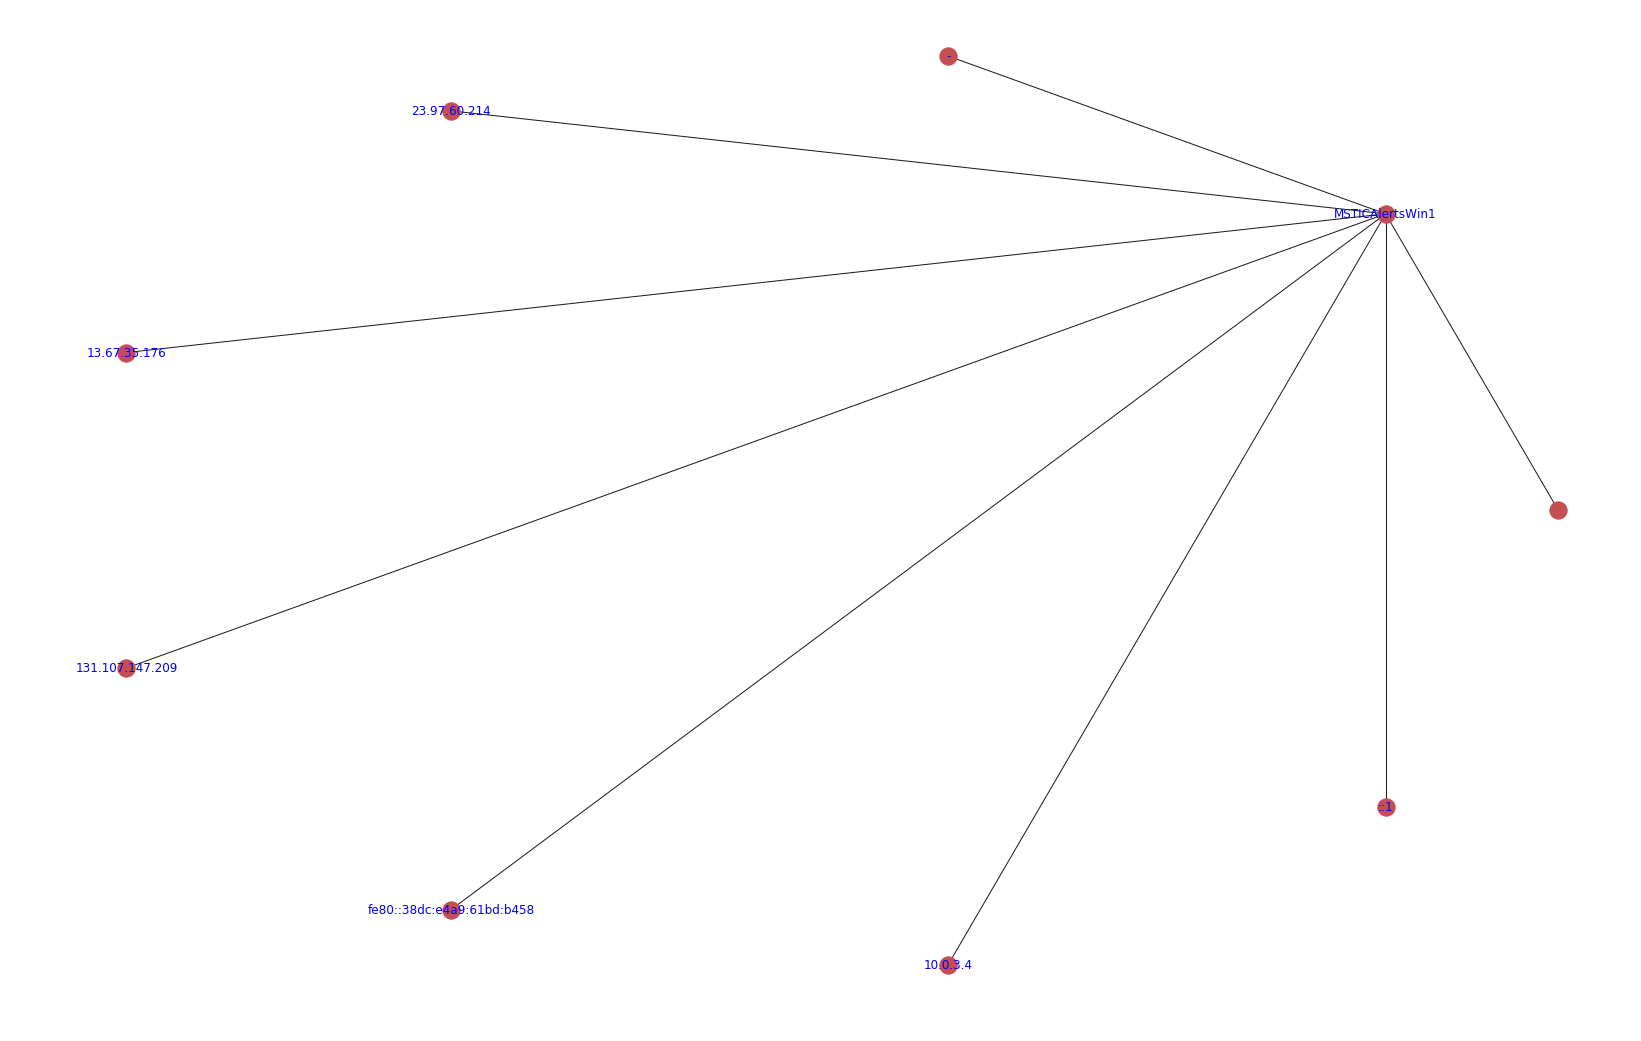

In [43]:
# Retrived relatd accounts from SecurityEvent table for Windows OS
if ip_entity['OSType'] =='Windows':
    if "SecurityEvent" not in available_datasets:
        raise ValueError("No Windows event log data available in the workspace")
    else:
        related_hosts = """
           SecurityEvent
           | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
           | where IpAddress == \'{ip_address}\' or Computer == \'{hostname}\'      
           | summarize count() by Computer, IpAddress
        """.format(
            **ipaddr_query_params(), hostname=hostname
        )
        %kql -query related_hosts
        related_hosts_df = _kql_raw_result_.to_dataframe()
    
elif ip_entity['OSType'] =='Linux':
    if "Syslog" not in available_datasets:
        raise ValueError("No Linux syslog data available in the workspace")
    else:
        related_hosts_df = qry_prov.LinuxSyslog.list_logons_for_source_ip(invest_times, ip_address=ipaddr_query_params()['ip_address'],add_query_items='extend IpAddress = HostIP | summarize count() by Computer, IpAddress')
        
# Displaying networkx - static graph. for interactive graph uncomment and run next block of code.
plt.figure(10, figsize=(22, 14))
g = nx.from_pandas_edgelist(related_hosts_df, "IpAddress", "Computer")
md('Entity Relationship Graph - Related Hosts :: ',styles=["bold","green"])
nx.draw_circular(g, with_labels=True, size=40, font_size=12, font_color="blue")

    
# Uncomment below cells if you want to dispaly interactive graphs using Pyvis library, Azure notebook free tier may not render the graph correctly.
# logonpyvis_graph = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

# # set the physics layout of the network
# logonpyvis_graph.barnes_hut()

# sources = related_hosts_df['Computer']
# targets = related_hosts_df['IpAddress']
# weights = related_hosts_df['count_']

# edge_data = zip(sources, targets, weights)

# for e in edge_data:
#     src = e[0]
#     dst = e[1]
#     w = e[2]

# logonpyvis_graph.add_node(src, src, title=src)
# logonpyvis_graph.add_node(dst, dst, title=dst)
# logonpyvis_graph.add_edge(src, dst, value=w)

# neighbor_map = logonpyvis_graph.get_adj_list()

# # add neighbor data to node hover data
# for node in logonpyvis_graph.nodes:
#     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
#     node["value"] = len(neighbor_map[node["id"]]) 

# logonpyvis_graph.show("hostlogonpyvis_graph.html")

<a></a>[Contents](#toc)
## Related Accounts
**Hypothesis:** That an attacker has gained  access to the host, compromized credentials for the accounts on it and laterally moving to the network gaining access to more accounts.

This section provides related accounts of IP address which is being investigated. .If you wish to expand the scope of hunting then investigate each accounts in detail, it is recommended that to use the **Account Explorer Notebook (include link).**

<a></a>[Contents](#toc)
### Visualization - Networkx Graph

<p style="font-weight: bold; color: green;">Entity Relationship Graph - Related Accounts :: </p>

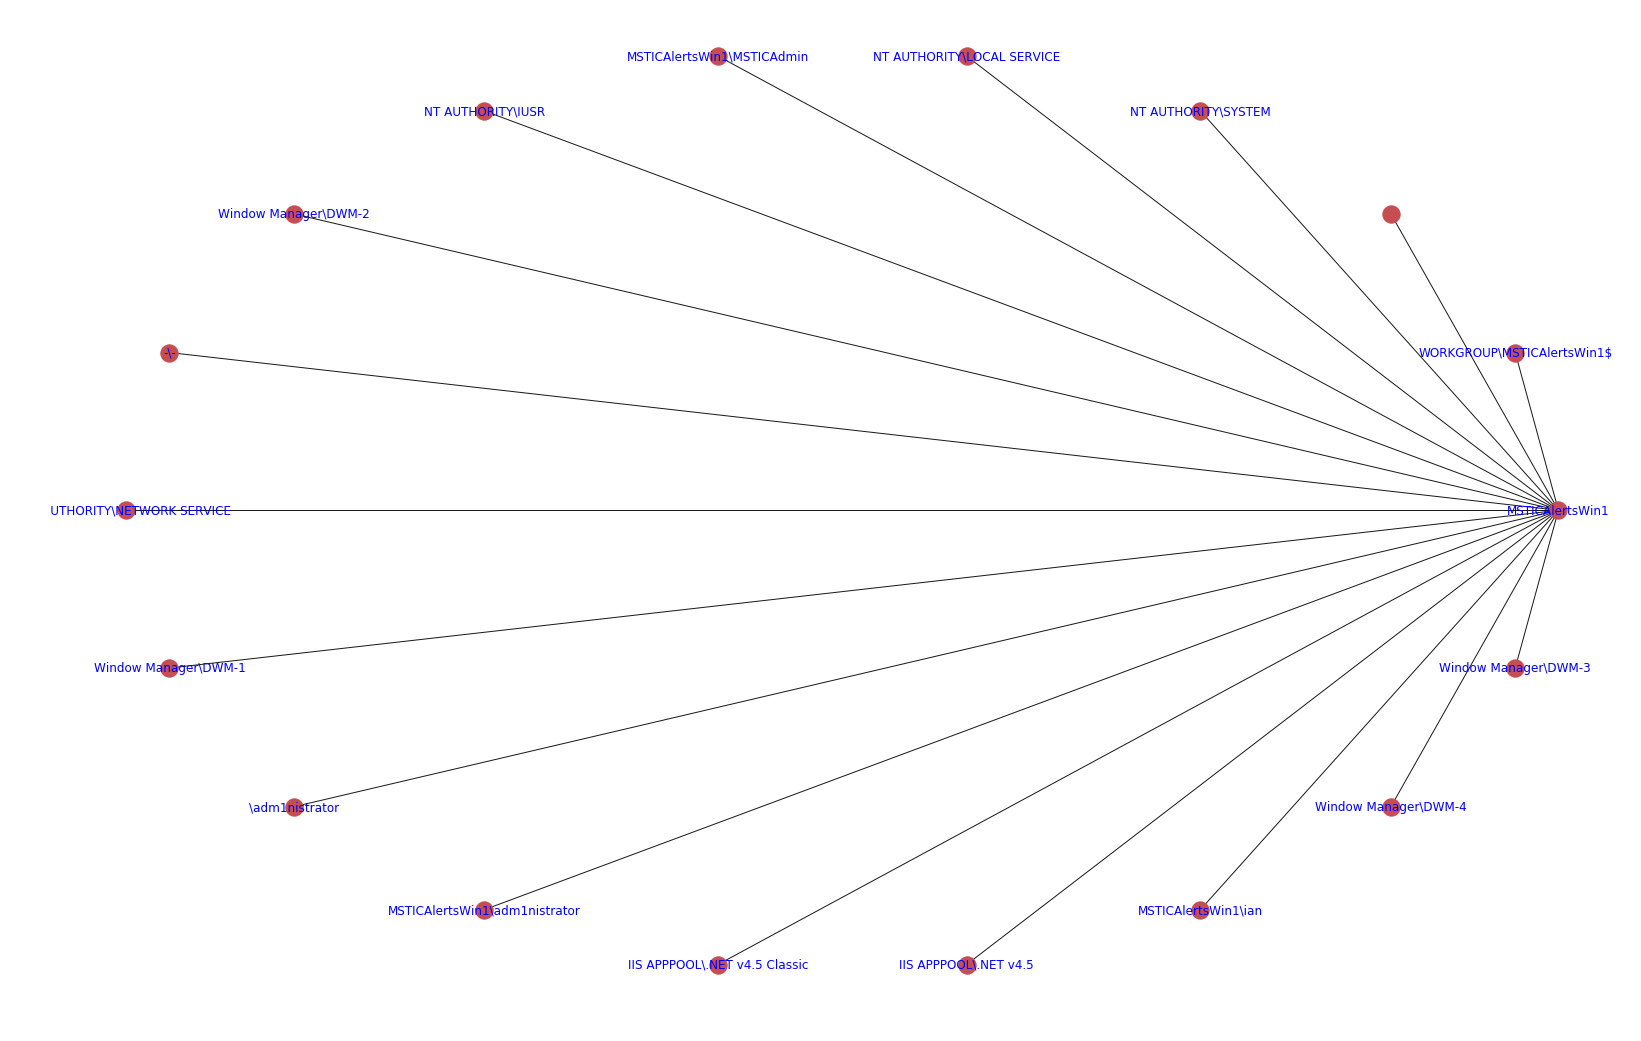

In [44]:
# Retrived relatd accounts from SecurityEvent table for Windows OS
if ip_entity['OSType'] =='Windows':
    if "SecurityEvent" not in available_datasets:
        raise ValueError("No Windows event log data available in the workspace")
    else:
        related_accounts = """
           SecurityEvent
           | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
           | where IpAddress == \'{ip_address}\' or Computer == \'{hostname}\'       
           | summarize count() by Account, Computer
        """.format(
            **ipaddr_query_params(), hostname=hostname
        )
        %kql -query related_accounts
        related_accounts_df = _kql_raw_result_.to_dataframe()
        
elif ip_entity['OSType'] =='Linux':
    if "Syslog" not in available_datasets:
        raise ValueError("No Linux syslog data available in the workspace")
    else:
        related_accounts_df = qry_prov.LinuxSyslog.list_logons_for_source_ip(invest_times, ip_address=ipaddr_query_params()['ip_address'],add_query_items='extend Account = AccountName | summarize count() by Account, Computer')


# Uncomment- below cells if above visualization does not render - Networkx connected Graph
plt.figure(10, figsize=(22, 14))
g = nx.from_pandas_edgelist(related_accounts_df, "Computer", "Account")
md('Entity Relationship Graph - Related Accounts :: ',styles=["bold","green"])
nx.draw_circular(g, with_labels=True, size=40, font_size=12, font_color="blue")

# Uncomment below cells if you want to display interactive graphs using Pyvis library, Azure notebook free tier may not render the graph correctly.
# acclogon_pyvisgraph = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

# # set the physics layout of the network
# acclogon_pyvisgraph.barnes_hut()


# sources = related_accounts_df['Computer']
# targets = related_accounts_df['Account']
# weights = related_accounts_df['count_']

# edge_data = zip(sources, targets, weights)

# for e in edge_data:
#     src = e[0]
#     dst = e[1]
#     w = e[2]

# acclogon_pyvisgraph.add_node(src, src, title=src)
# acclogon_pyvisgraph.add_node(dst, dst, title=dst)
# acclogon_pyvisgraph.add_edge(src, dst, value=w)

# neighbor_map = acclogon_pyvisgraph.get_adj_list()

# # add neighbor data to node hover data
# for node in acclogon_pyvisgraph.nodes:
#     node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
#     node["value"] = len(neighbor_map[node["id"]]) # this value attrribute for the node affects node size
    
# acclogon_pyvisgraph.show("accountlogonpyvis_graph.html")

<a></a>[Contents](#toc)
## Logon Summary for Related Entities
**Hypothesis:** By analyzing logon activities of the related entities, we can identify change in logon patterns and narrow down the entities to few suspicious logon patterns.

This section provides various visualization of logon attributes such as 
- Weekly Failed Logon trend
- Logon Types 
- Logon Processes

If you wish to expand the scope of hunting then investigate specific host in detail, it is recommended that to use the **Host Explorer Notebook (include link).**

<a></a>[Contents](#toc)
### HeatMap for Weekly failed logons

###  <span style="color: blue;"> Heatmap - Weekly Failed Logon Trend :: </span>

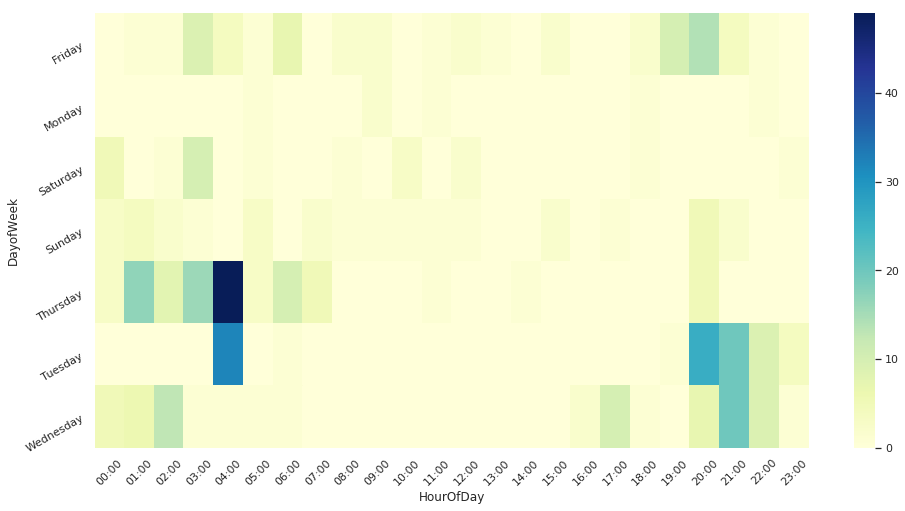

In [67]:
# Retrived relatd accounts from SecurityEvent table for Windows OS
if ip_entity['OSType'] =='Windows':
    if "SecurityEvent" not in available_datasets:
        raise ValueError("No Windows event log data available in the workspace")
    else:
        failed_logons = """
           SecurityEvent
            | where EventID in (4624,4625) | where IpAddress == \'{ip_address}\' or Computer == \'{hostname}\'  
            | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
            | extend DayofWeek = case(dayofweek(TimeGenerated) == time(1.00:00:00), "Monday", 
                                dayofweek(TimeGenerated) == time(2.00:00:00), "Tuesday",
                                dayofweek(TimeGenerated) == time(3.00:00:00), "Wednesday",
                                dayofweek(TimeGenerated) == time(4.00:00:00), "Thursday",
                                dayofweek(TimeGenerated) == time(5.00:00:00), "Friday",
                                dayofweek(TimeGenerated) == time(6.00:00:00), "Saturday",
                                "Sunday")
            | summarize LogonCount=count() by DayofWeek, HourOfDay=format_datetime(bin(TimeGenerated,1h),'HH:mm')
        """.format(
            **ipaddr_query_params(), hostname=hostname
        )
        %kql -query failed_logons
        failed_logons_df = _kql_raw_result_.to_dataframe()

elif ip_entity['OSType'] =='Linux':
    if "Syslog" not in available_datasets:
        raise ValueError("No Linux syslog data available in the workspace")
    else:   
        failed_logons_df = qry_prov.LinuxSyslog.user_logon(invest_times, account_name ='', add_query_items="""| where HostIP == '{ipaddr_text.value}' |extend Account = AccountName | extend DayofWeek = case(dayofweek(TimeGenerated) == time(1.00:00:00), "Monday", dayofweek(TimeGenerated) == time(2.00:00:00), "Tuesday",
                                dayofweek(TimeGenerated) == time(3.00:00:00), "Wednesday",
                                dayofweek(TimeGenerated) == time(4.00:00:00), "Thursday",
                                dayofweek(TimeGenerated) == time(5.00:00:00), "Friday",
                                dayofweek(TimeGenerated) == time(6.00:00:00), "Saturday", "Sunday") | summarize LogonCount=count() by DayofWeek, HourOfDay=format_datetime(bin(TimeGenerated,1h),'HH:mm')""")

# Plotting hearmap using seaborn library if there are failed logons
if len(failed_logons_df) > 0:
    df_pivot = (
        failed_logons_df.reset_index()
        .pivot_table(index="DayofWeek", columns="HourOfDay", values="LogonCount")
        .fillna(0)
    )
    display(
        Markdown(
            f'###  <span style="color:blue"> Heatmap - Weekly Failed Logon Trend :: </span>'
        )
    )
    f, ax = plt.subplots(figsize=(16, 8))
    hm1 = sns.heatmap(df_pivot, cmap="YlGnBu", ax=ax)
    plt.xticks(rotation=45)
    plt.yticks(rotation=30)
else:
    linux_logons=qry_prov.LinuxSyslog.list_logons_for_source_ip(**ipaddr_query_params())
    failed_logons = (logon_events[logon_events['LogonResult'] == 'Failure'])

<a></a>[Contents](#toc)
### Host Logons Timeline

In [51]:
# set the origin time to the time of our alert
try:
    origin_time = (related_alert.TimeGenerated 
                   if recenter_wgt.value 
                   else query_times.origin_time)
except NameError:
    origin_time = query_times.origin_time
    
logon_query_times = nbwidgets.QueryTime(
    units="day",
    origin_time=origin_time,
    before=5,
    after=1,
    max_before=20,
    max_after=20,
)
logon_query_times.display()

HTML(value='<h4>Set query time boundaries</h4>')

In [52]:
host_logons = qry_prov.WindowsSecurity.list_host_logons(
    logon_query_times, host_name=hostname
)

if host_logons is not None and not host_logons.empty:
    display(Markdown("### Logon timeline."))
    tooltip_cols = [
        "TargetUserName",
        "TargetDomainName",
        "SubjectUserName",
        "SubjectDomainName",
        "LogonType",
        "IpAddress",
    ]
    nbdisplay.display_timeline(
        data=host_logons,
        group_by="TargetUserName",
        source_columns=tooltip_cols,
        legend_column="TargetUserName",
        legend="right", yaxis=True
    )

    display(Markdown("### Counts of logon events by logon type."))
    display(Markdown("Min counts for each logon type highlighted."))
    logon_by_type = (
        host_logons[["Account", "LogonType", "EventID"]]
        .astype({'LogonType': 'int32'})
        .merge(right=pd.Series(data=nbdisplay._WIN_LOGON_TYPE_MAP, name="LogonTypeDesc"),
               left_on="LogonType", right_index=True)
        .drop(columns="LogonType")
        .groupby(["Account", "LogonTypeDesc"])
        .count()
        .unstack()
        .rename(columns={"EventID": "LogonCount"})
        .fillna(0)
        .style
        .background_gradient(cmap="viridis", low=0.5, high=0)
        .format("{0:0>3.0f}")
    )
    display(logon_by_type)
else:
    display(Markdown("No logon events found for host."))


### Logon timeline.

Loading BokehJS ...

### Counts of logon events by logon type.

Min counts for each logon type highlighted.

### Failed Logons Timeline

In [53]:
failedLogons = qry_prov.WindowsSecurity.list_host_logon_failures(
    logon_query_times, host_name=ip_entity.hostname
)
if failedLogons.empty:
    print("No logon failures recorded for this host between ",
          f" {logon_query_times.start} and {logon_query_times.end}"
        )
else:
    nbdisplay.display_timeline(
        data=host_logons.query('TargetLogonId != "0x3e7"'),
        overlay_data=failedLogons,
        alert=related_alert,
        title="Logons (blue=user-success, green=failed)",
        source_columns=tooltip_cols,
        height=200,
    )
    display(failedLogons
 .astype({'LogonType': 'int32'})
 .merge(right=pd.Series(data=nbdisplay._WIN_LOGON_TYPE_MAP, name="LogonTypeDesc"),
               left_on="LogonType", right_index=True)
 [['Account', 'EventID', 'TimeGenerated',
  'Computer', 'SubjectUserName', 'SubjectDomainName',
   'TargetUserName', 'TargetDomainName',
   'LogonTypeDesc','IpAddress', 'WorkstationName'
  ]])

Loading BokehJS ...

Account  EventID           TimeGenerated         Computer  \
0  MSTICAlertsWin1\ian     4625 2019-02-14 04:23:55.400  MSTICAlertsWin1   
1  MSTICAlertsWin1\ian     4625 2019-02-13 16:28:05.417  MSTICAlertsWin1   
3  MSTICAlertsWin1\ian     4625 2019-02-15 04:09:38.523  MSTICAlertsWin1   
2  MSTICAlertsWin1\ian     4625 2019-02-12 20:28:38.637  MSTICAlertsWin1   

    SubjectUserName SubjectDomainName TargetUserName TargetDomainName  \
0  MSTICAlertsWin1$         WORKGROUP            ian  MSTICAlertsWin1   
1  MSTICAlertsWin1$         WORKGROUP            ian  MSTICAlertsWin1   
3  MSTICAlertsWin1$         WORKGROUP            ian  MSTICAlertsWin1   
2        MSTICAdmin   MSTICAlertsWin1            ian  MSTICAlertsWin1   

  LogonTypeDesc IpAddress  WorkstationName  
0         Batch         -  MSTICAlertsWin1  
1         Batch         -  MSTICAlertsWin1  
3         Batch         -  MSTICAlertsWin1  
2   Interactive       ::1  MSTICAlertsWin1

<a></a>[Contents](#toc)
## Network Connection Analysis

**Hypothesis:** That an attacker is remotely communicating with the host in order to compromise the host or for outbound communication to C2 for data exfiltration purposes after compromising the host.

This section provides an overview of network activity to and from the host during hunting time frame, the purpose of this is for the identification of anomalous network traffic. If you wish to investigate a specific IP in detail it is recommended that to use another instance of this notebook with each IP addresses.

<a></a>[Contents](#toc)
### Network Check Communications with Other Hosts

In [54]:
ip_q_times = nbwidgets.QueryTime(
    label="Set time bounds for network queries",
    units="day",
    max_before=28,
    before=2,
    after=5,
    max_after=28,
    origin_time=logon_query_times.origin_time
)
ip_q_times.display()

HTML(value='<h4>Set time bounds for network queries</h4>')

<a></a>[Contents](#toc)
### Query Flows by IP Address

In [55]:
if "AzureNetworkAnalytics_CL" not in available_datasets:
    md_warn("No network flow data available.")
    md("Please skip the remainder of this section and go to [Time-Series-Anomalies](#Outbound-Data-transfer-Time-Series-Anomalies)")
    az_net_comms_df = None
else:
    all_host_ips = (
        ip_entity['private_ips'] + ip_entity['public_ips']
    )
    host_ips = [i.Address for i in all_host_ips]

    az_net_comms_df = qry_prov.Network.list_azure_network_flows_by_ip(
        ip_q_times, ip_address_list=host_ips
    )

    if isinstance(az_net_comms_df, pd.DataFrame) and not az_net_comms_df.empty:
        az_net_comms_df['TotalAllowedFlows'] = az_net_comms_df['AllowedOutFlows'] + az_net_comms_df['AllowedInFlows']
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="L7Protocol",
            title="Network Flows by Protocol",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="FlowDirection",
            title="Network Flows by Direction",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
    else:
        md_warn("No network data for specified time range.")
        md("Please skip the remainder of this section and go to [Time-Series-Anomalies](#Outbound-Data-transfer-Time-Series-Anomalies)")

Loading BokehJS ...

Loading BokehJS ...

In [56]:

flow_plot = nbdisplay.display_timeline_values(data=az_net_comms_df,
                                  group_by="L7Protocol",
                                  source_columns=["FlowType", 
                                                  "AllExtIPs", 
                                                  "L7Protocol", 
                                                  "FlowDirection", 
                                                  "TotalAllowedFlows"],
                                  time_column="FlowStartTime",
                                  y="TotalAllowedFlows",
                                  legend="right",
                                  legend_column="L7Protocol", 
                                  height=500,
                                  kind=["vbar", "circle"]);

Loading BokehJS ...

In [57]:
if az_net_comms_df is not None and not az_net_comms_df.empty:
    cm = sns.light_palette("green", as_cmap=True)

    cols = [
        "VMName",
        "VMIPAddress",
        "PublicIPs",
        "SrcIP",
        "DestIP",
        "L4Protocol",
        "L7Protocol",
        "DestPort",
        "FlowDirection",
        "AllExtIPs",
        "TotalAllowedFlows",
    ]
    flow_index = az_net_comms_df[cols].copy()

    def get_source_ip(row):
        if row.FlowDirection == "O":
            return row.VMIPAddress if row.VMIPAddress else row.SrcIP
        else:
            return row.AllExtIPs if row.AllExtIPs else row.DestIP

    def get_dest_ip(row):
        if row.FlowDirection == "O":
            return row.AllExtIPs if row.AllExtIPs else row.DestIP
        else:
            return row.VMIPAddress if row.VMIPAddress else row.SrcIP

    flow_index["source"] = flow_index.apply(get_source_ip, axis=1)
    flow_index["dest"] = flow_index.apply(get_dest_ip, axis=1)

    # Uncomment to view flow_index results
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
#         display(
#             flow_index[
#                 ["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]
#             ]
#             .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
#             .sum()
#             .reset_index()
#             .style.bar(subset=["TotalAllowedFlows"], color="#d65f5f")
#         )

In [58]:
# WHOIS lookup function
from functools import lru_cache
from ipwhois import IPWhois
from ipaddress import ip_address


# Add ASN informatio from Whois
flows_df = (
    flow_index[["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]]
    .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
    .sum()
    .reset_index()
)

num_ips = len(flows_df["source"].unique()) + len(flows_df["dest"].unique())
print(f"Performing WhoIs lookups for {num_ips} IPs ", end="")
#flows_df = flows_df.assign(DestASN="", DestASNFull="", SourceASN="", SourceASNFull="")
flows_df["DestASN"] = flows_df.apply(lambda x: get_whois_info(x.dest, True), axis=1)
flows_df["SourceASN"] = flows_df.apply(lambda x: get_whois_info(x.source, True), axis=1)
print("done")

# Split the tuple returned by get_whois_info into separate columns
flows_df["DestASNFull"] = flows_df.apply(lambda x: x.DestASN[1], axis=1)
flows_df["DestASN"] = flows_df.apply(lambda x: x.DestASN[0], axis=1)
flows_df["SourceASNFull"] = flows_df.apply(lambda x: x.SourceASN[1], axis=1)
flows_df["SourceASN"] = flows_df.apply(lambda x: x.SourceASN[0], axis=1)

our_host_asns = [get_whois_info(ip.Address)[0] for ip in ip_entity.public_ips]
md(f"Host {ip_entity.hostname} ASNs:", "bold")
md(str(our_host_asns))

flow_sum_df = flows_df.groupby(["DestASN", "SourceASN"]).agg(
    TotalAllowedFlows=pd.NamedAgg(column="TotalAllowedFlows", aggfunc="sum"),
    L7Protocols=pd.NamedAgg(column="L7Protocol", aggfunc=lambda x: x.unique().tolist()),
    source_ips=pd.NamedAgg(column="source", aggfunc=lambda x: x.unique().tolist()),
    dest_ips=pd.NamedAgg(column="dest", aggfunc=lambda x: x.unique().tolist()),
).reset_index()
flow_sum_df

Performing WhoIs lookups for 187 IPs .....................................................................................................................................................................................done


<p style="font-weight: bold;">Host MSTICAlertsWin1 ASNs:</p>

<p style="">['MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corporation, US']</p>

DestASN  \
0                                 AKAMAI-AS - Akamai Technologies, Inc., US   
1                                                           AKAMAI-ASN1, US   
2                                          AMAZON-02 - Amazon.com, Inc., US   
3                                                           BYTEMARK-AS, GB   
4         CENTURYLINK-US-LEGACY-QWEST - CenturyLink Communications, LLC, US   
5   EDGECAST - MCI Communications Services, Inc. d/b/a Verizon Business, US   
6                                                   GOOGLE - Google LLC, US   
7                            HIGHWINDS3 - Highwinds Network Group, Inc., US   
8                                                                  JUMP, GB   
9                                          LEVEL3 - Level 3 Parent, LLC, US   
10                  MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corporation, US   
11                  MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corporation, US   
12                   N ASN Information since IP address is of type: Private   
13                   N ASN Information since IP address is of type: Private   
14                                                                TELE2, SE   

                                                  SourceASN  \
0    N ASN Information since IP address is of type: Private   
1    N ASN Information since IP address is of type: Private   
2    N ASN Information since IP address is of type: Private   
3    N ASN Information since IP address is of type: Private   
4    N ASN Information since IP address is of type: Private   
5    N ASN Information since IP address is of type: Private   
6    N ASN Information since IP address is of type: Private   
7    N ASN Information since IP address is of type: Private   
8    N ASN Information since IP address is of type: Private   
9    N ASN Information since IP address is of type: Private   
10  MICROSOFT-CORP-MSN-AS-BLOCK - Microsoft Corporation, US   
11   N ASN Information since IP address is of type: Private   
12            MICROSOFT-CORP-AS - Microsoft Corporation, US   
13   N ASN Information since IP address is of type: Private   
14   N ASN Information since IP address is of type: Private   

    TotalAllowedFlows              L7Protocols                    source_ips  \
0               351.0            [http, https]                    [10.0.3.5]   
1               353.0            [https, http]                    [10.0.3.5]   
2                37.0            [https, http]                    [10.0.3.5]   
3                 5.0                  [https]                    [10.0.3.5]   
4                36.0                   [http]                    [10.0.3.5]   
5               801.0            [https, http]                    [10.0.3.5]   
6              5941.0            [https, http]                    [10.0.3.5]   
7                45.0                   [http]                    [10.0.3.5]   
8                 5.0                  [https]                    [10.0.3.5]   
9                46.0                   [http]                    [10.0.3.5]   
10                8.0          [ms-wbt-server]  [13.67.35.176, 23.97.60.214]   
11            11726.0  [ssh, https, http, ntp]                    [10.0.3.5]   
12                9.0          [ms-wbt-server]             [131.107.147.209]   
13                8.0      [microsoft-ds, ssh]          [10.0.3.4, 10.0.3.5]   
14                2.0                    [ftp]                    [10.0.3.5]   

                                                                                               dest_ips  
0     [23.223.3.100, 23.32.68.208, 23.32.69.100, 23.4.187.27, 23.47.27.169, 23.62.27.130, 23.62.27.139]  
1   [104.116.249.67, 104.117.0.237, 23.215.130.137, 23.219.93.56, 23.3.13.106, 23.3.13.112, 23.3.13....  
2                                             [99.84.104.63, 99.84.106.178, 99.84.106.27, 99.84.106.92]  
3                                                                                        

### Choose ASNs/IPs to Check for Threat Intel Reports
Choose from the list of Selected ASNs for the IPs you wish to check on.
The Source list is been pre-populated with all ASNs found in the network flow summary.

As an example, we've populated the `Selected` list with the ASNs that have the lowest number of flows to and from the host. We also remove the ASN that matches the ASN of the host we are investigating.

Please edit this list, using flow summary data above as a guide and leaving only ASNs that you are suspicious about. Typicially these would be ones with relatively low `TotalAllowedFlows` and possibly with unusual `L7Protocols`.

In [59]:
all_asns = list(flow_sum_df["DestASN"].unique()) + list(flow_sum_df["SourceASN"].unique())
all_asns = set(all_asns) - set(["private address"])

# Select the ASNs in the 25th percentile (lowest number of flows)
quant_25pc = flow_sum_df["TotalAllowedFlows"].quantile(q=[0.25]).iat[0]
quant_25pc_df = flow_sum_df[flow_sum_df["TotalAllowedFlows"] <= quant_25pc]
other_asns = list(quant_25pc_df["DestASN"].unique()) + list(quant_25pc_df["SourceASN"].unique())
other_asns = set(other_asns) - set(our_host_asns)
md("Choose IPs from Selected ASNs to look up for Threat Intel.", "bold")
sel_asn = nbwidgets.SelectSubset(source_items=all_asns, default_selected=other_asns)

<p style="font-weight: bold;">Choose IPs from Selected ASNs to look up for Threat Intel.</p>

In [60]:
ti_lookup = TILookup()
from itertools import chain
dest_ips = set(chain.from_iterable(flow_sum_df[flow_sum_df["DestASN"].isin(sel_asn.selected_items)]["dest_ips"]))
src_ips = set(chain.from_iterable(flow_sum_df[flow_sum_df["SourceASN"].isin(sel_asn.selected_items)]["source_ips"]))
selected_ips = dest_ips | src_ips
print(f"{len(selected_ips)} unique IPs in selected ASNs")

# Add the IoCType to save cost of inferring each item
selected_ip_dict = {ip: "ipv4" for ip in selected_ips}
ti_results = ti_lookup.lookup_iocs(data=selected_ip_dict)

print(f"{len(ti_results)} results received.")

# ti_results_pos = ti_results[ti_results["Severity"] > 0]
#####
# WARNING - faking results for illustration purposes
#####
ti_results_pos = ti_results.sample(n=2)

print(f"{len(ti_results_pos)} positive results found.")


if not ti_results_pos.empty:
    src_pos = flows_df.merge(ti_results_pos, left_on="source", right_on="Ioc")
    dest_pos = flows_df.merge(ti_results_pos, left_on="dest", right_on="Ioc")
    ti_ip_results = pd.concat([src_pos, dest_pos])
    md_warn("Positive Threat Intel Results found for the following flows")
    md("Please examine these IP flows using the IP Explorer notebook.", "bold, large")
    display(ti_ip_results)

5 unique IPs in selected ASNs
14 results received.
2 positive results found.


<p style="font-weight: bold; color: red; font-size: 130%;">Warning: Positive Threat Intel Results found for the following flows</p>

<p style="font-weight: bold; font-size: 130%;">Please examine these IP flows using the IP Explorer notebook.</p>

source         dest L7Protocol FlowDirection  TotalAllowedFlows  \
0  10.0.3.5  46.43.34.31      https             O                5.0   
1  10.0.3.5  46.43.34.31      https             O                5.0   

           DestASN                                               SourceASN  \
0  BYTEMARK-AS, GB  N ASN Information since IP address is of type: Private   
1  BYTEMARK-AS, GB  N ASN Information since IP address is of type: Private   

                                                                                           DestASNFull  \
0  {'nir': None, 'asn_registry': 'ripencc', 'asn': '35425', 'asn_cidr': '46.43.0.0/18', 'asn_countr...   
1  {'nir': None, 'asn_registry': 'ripencc', 'asn': '35425', 'asn_cidr': '46.43.0.0/18', 'asn_countr...   

  SourceASNFull          Ioc IocType QuerySubtype Provider  Result  Severity  \
0            {}  46.43.34.31    ipv4         None    AzSTI   False         0   
1            {}  46.43.34.31    ipv4         None   XForce   False         0   

                                                Details         RawResult  \
0                                            Not found.               NaN   
1  Authorization failed. Check account and key details.  <Response [401]>   

                                                                                             Reference  \
0   ThreatIntelligenceIndicator  | where TimeGenerated >= datetime(2019-10-01T20:47:36.518413Z) | w...   
1                                                      https://api.xforce.ibmcloud.com/ipr/46.43.34.31   

   Status  
0       0  
1     401

 ### GeoIP Map of External IPs

In [61]:
iplocation = GeoLiteLookup()
def format_ip_entity(row, ip_col):
    ip_entity = entities.IpAddress(Address=row[ip_col])
    iplocation.lookup_ip(ip_entity=ip_entity)
    ip_entity.AdditionalData["protocol"] = row.L7Protocol
    if "severity" in row:
        ip_entity.AdditionalData["threat severity"] = row["severity"]
    if "Details" in row:
        ip_entity.AdditionalData["threat details"] = row["Details"]
    return ip_entity

# from msticpy.nbtools.foliummap import FoliumMap
folium_map = FoliumMap()
if az_net_comms_df is None or az_net_comms_df.empty:
    print("No network flow data available.")
else:
    # Get the flow records for all flows not in the TI results
    selected_out = flows_df[flows_df["DestASN"].isin(sel_asn.selected_items)]
    selected_out = selected_out[~selected_out["dest"].isin(ti_ip_results["Ioc"])]
    if selected_out.empty:
        ips_out = []
    else:
        ips_out = list(selected_out.apply(lambda x: format_ip_entity(x, "dest"), axis=1))
    
    selected_in = flows_df[flows_df["SourceASN"].isin(sel_asn.selected_items)]
    selected_in = selected_in[~selected_in["source"].isin(ti_ip_results["Ioc"])]
    if selected_in.empty:
        ips_in = []
    else:
        ips_in = list(selected_in.apply(lambda x: format_ip_entity(x, "source"), axis=1))

    ips_threats = list(ti_ip_results.apply(lambda x: format_ip_entity(x, "Ioc"), axis=1))

    display(HTML("<h3>External IP Addresses communicating with host</h3>"))
    display(HTML("Numbered circles indicate multiple items - click to expand"))
    display(HTML("Location markers: <br>Blue = outbound, Purple = inbound, Green = Host, Red = Threats"))

    icon_props = {"color": "green"}
    for ips in ip_entity.public_ips:
        ips.AdditionalData["host"] = ip_entity.hostname
    folium_map.add_ip_cluster(ip_entities=ip_entity.public_ips, **icon_props)
    icon_props = {"color": "blue"}
    folium_map.add_ip_cluster(ip_entities=ips_out, **icon_props)
    icon_props = {"color": "purple"}
    folium_map.add_ip_cluster(ip_entities=ips_in, **icon_props)
    icon_props = {"color": "red"}
    folium_map.add_ip_cluster(ip_entities=ips_threats, **icon_props)
    
    display(folium_map)

<a></a>[Contents](#toc)
### Outbound Data transfer Time Series Anomalies

This section will look into the network datasources to check outbound data transfer trends. 
You can also use time series analysis using below built-in KQL query example to analyze anamalous data transfer trends.below example shows sample dataset trends comparing with actual vs baseline traffic trends.

In [66]:
if "VMConnection" in table_index or "CommonSecurityLog" in table_index:
    # KQL query for full text search of IP address and display all datatypes
    dataxfer_stats = """
      union isfuzzy=true
      (
      CommonSecurityLog 
      | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end})
      | where isnotempty(DestinationIP) and isnotempty(SourceIP)
      | where SourceIP == \'{ip_address}\'
      | extend SentBytesinKB = (SentBytes / 1024), ReceivedBytesinKB = (ReceivedBytes / 1024)
      | summarize DailyCount = count(), ListOfDestPorts = make_set(DestinationPort), TotalSentBytesinKB = sum(SentBytesinKB), TotalReceivedBytesinKB = sum(ReceivedBytesinKB) by SourceIP, DestinationIP, DeviceVendor, bin(TimeGenerated,1d)
      | project DeviceVendor, TimeGenerated, SourceIP, DestinationIP, ListOfDestPorts, TotalSentBytesinKB, TotalReceivedBytesinKB 
      ),
      (
      VMConnection 
      | where TimeGenerated >= datetime({start}) and TimeGenerated <= datetime({end}) 
      | where isnotempty(DestinationIp) and isnotempty(SourceIp)
      | where SourceIp == \'{ip_address}\'
      | extend DeviceVendor = "VMConnection", SourceIP = SourceIp, DestinationIP = DestinationIp
      | extend SentBytesinKB = (BytesSent / 1024), ReceivedBytesinKB = (BytesReceived / 1024)
      | summarize DailyCount = count(), ListOfDestPorts = make_set(DestinationPort), TotalSentBytesinKB = sum(SentBytesinKB),TotalReceivedBytesinKB = sum(ReceivedBytesinKB) by SourceIP, DestinationIP, DeviceVendor, bin(TimeGenerated,1d)
      | project DeviceVendor, TimeGenerated, SourceIP, DestinationIP, ListOfDestPorts, TotalSentBytesinKB, TotalReceivedBytesinKB 
      )
    """.format(**ipaddr_query_params())
    %kql -query dataxfer_stats
    dataxfer_stats_df = _kql_raw_result_.to_dataframe()

#Display result as transposed matrix of datatypes availabel to query for the query period
if len(dataxfer_stats_df) > 0:
    md(
            'Data transfer daily stats for IP ::', styles=["bold","green"]
        )
    display(dataxfer_stats_df)
else:
    md_warn(
            f'No Data transfer logs found for the query period'
        )

md(
            'Visualizing time series data transfer on dummy dataset for demonstration ::', styles=["bold","green"]
    )

timechartquery = """
let TimeSeriesData = PaloAltoBytesSent_CL
| extend TimeGenerated = todatetime(EventTime_s), TotalBytesSent = todouble(TotalBytesSent_s) 
| summarize TimeGenerated=make_list(TimeGenerated, 10000),TotalBytesSent=make_list(TotalBytesSent, 10000) by deviceVendor_s
| project TimeGenerated, TotalBytesSent;
TimeSeriesData
| extend (baseline,seasonal,trend,residual) = series_decompose(TotalBytesSent)
| mv-expand TotalBytesSent to typeof(double), TimeGenerated to typeof(datetime), baseline to typeof(long), seasonal to typeof(long), trend to typeof(long), residual to typeof(long)
| project TimeGenerated, TotalBytesSent, baseline
| render timechart with (title="Palo Alto Outbound Data Transfer Time Series decomposition")
"""
%kql -query timechartquery

<p style="font-weight: bold; color: red; font-size: 130%;">Warning: No Data transfer logs found for the query period</p>

<p style="font-weight: bold; color: green;">Visualizing time series data transfer on dummy dataset for demonstration ::</p>

<script type="text/javascript">
 window.PlotlyConfig = {MathJaxConfig: 'local'};
 if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
 if (typeof require !== 'undefined') {
 require.undef("plotly");
 requirejs.config({
 paths: {
 'plotly': ['https://cdn.plot.ly/plotly-latest.min']
 }
 });
 require(['plotly'], function(Plotly) {
 window._Plotly = Plotly;
 });
 }
 </script>

<script type="text/javascript">
 require(["plotly"], function(Plotly) {
 window.PLOTLYENV=window.PLOTLYENV || {};
 
 if (document.getElementById("ae8f56ef-8846-452b-ab2c-b3b677576071")) {
 Plotly.newPlot(
 'ae8f56ef-8846-452b-ab2c-b3b677576071',
 [{"line": {"color": "rgb(31, 118, 179)", "width": 1}, "name": "TotalBytesSent", "opacity": 0.8, "type": "scatter", "uid": "fb2d50ba-0c67-43fb-ba21-0740bc8aa816", "x": ["2019-05-01T06:00:00+00:00", "2019-05-01T07:00:00+00:00", "2019-05-01T08:00:00+00:00", "2019-05-01T09:00:00+00:00", "2019-05-01T10:00:00+00:00", "2019-05-01T11:00:00+00:00", "2019-05-01T12:00:00+00:00", "2019-05-01T13:00:00+00:00", "2019-05-01T14:00:00+00:00", "2019-05-01T15:00:00+00:00", "2019-05-01T16:00:00+00:00", "2019-05-01T17:00:00+00:00", "2019-05-01T18:00:00+00:00", "2019-05-01T19:00:00+00:00", "2019-05-01T20:00:00+00:00", "2019-05-01T21:00:00+00:00", "2019-05-01T22:00:00+00:00", "2019-05-01T23:00:00+00:00", "2019-05-02T00:00:00+00:00", "2019-05-02T01:00:00+00:00", "2019-05-02T02:00:00+00:00", "2019-05-02T03:00:00+00:00", "2019-05-02T04:00:00+00:00", "2019-05-02T05:00:00+00:00", "2019-05-02T06:00:00+00:00", "2019-05-02T07:00:00+00:00", "2019-05-02T08:00:00+00:00", "2019-05-02T09:00:00+00:00", "2019-05-02T10:00:00+00:00", "2019-05-02T11:00:00+00:00", "2019-05-02T12:00:00+00:00", "2019-05-02T13:00:00+00:00", "2019-05-02T14:00:00+00:00", "2019-05-02T15:00:00+00:00", "2019-05-02T16:00:00+00:00", "2019-05-02T17:00:00+00:00", "2019-05-02T18:00:00+00:00", "2019-05-02T19:00:00+00:00", "2019-05-02T20:00:00+00:00", "2019-05-02T21:00:00+00:00", "2019-05-02T22:00:00+00:00", "2019-05-02T23:00:00+00:00", "2019-05-03T00:00:00+00:00", "2019-05-03T01:00:00+00:00", "2019-05-03T02:00:00+00:00", "2019-05-03T03:00:00+00:00", "2019-05-03T04:00:00+00:00", "2019-05-03T05:00:00+00:00", "2019-05-03T06:00:00+00:00", "2019-05-03T07:00:00+00:00", "2019-05-03T08:00:00+00:00", "2019-05-03T09:00:00+00:00", "2019-05-03T10:00:00+00:00", "2019-05-03T11:00:00+00:00", "2019-05-03T12:00:00+00:00", "2019-05-03T13:00:00+00:00", "2019-05-03T14:00:00+00:00", "2019-05-03T15:00:00+00:00", "2019-05-03T16:00:00+00:00", "2019-05-03T17:00:00+00:00", "2019-05-03T18:00:00+00:00", "2019-05-03T19:00:00+00:00", "2019-05-03T20:00:00+00:00", "2019-05-03T21:00:00+00:00", "2019-05-03T22:00:00+00:00", "2019-05-03T23:00:00+00:00", "2019-05-04T00:00:00+00:00", "2019-05-04T01:00:00+00:00", "2019-05-04T02:00:00+00:00", "2019-05-04T03:00:00+00:00", "2019-05-04T04:00:00+00:00", "2019-05-04T05:00:00+00:00", "2019-05-04T06:00:00+00:00", "2019-05-04T07:00:00+00:00", "2019-05-04T08:00:00+00:00", "2019-05-04T09:00:00+00:00", "2019-05-04T10:00:00+00:00", "2019-05-04T11:00:00+00:00", "2019-05-04T12:00:00+00:00", "2019-05-04T13:00:00+00:00", "2019-05-04T14:00:00+00:00", "2019-05-04T15:00:00+00:00", "2019-05-04T16:00:00+00:00", "2019-05-04T17:00:00+00:00", "2019-05-04T18:00:00+00:00", "2019-05-04T19:00:00+00:00", "2019-05-04T20:00:00+00:00", "2019-05-04T21:00:00+00:00", "2019-05-04T22:00:00+00:00", "2019-05-04T23:00:00+00:00", "2019-05-05T00:00:00+00:00", "2019-05-05T01:00:00+00:00", "2019-05-05T02:00:00+00:00", "2019-05-05T03:00:00+00:00", "2019-05-05T04:00:00+00:00", "2019-05-05T05:00:00+00:00", "2019-05-05T06:00:00+00:00", "2019-05-05T07:00:00+00:00", "2019-05-05T08:00:00+00:00", "2019-05-05T09:00:00+00:00", "2019-05-05T10:00:00+00:00", "2019-05-05T11:00:00+00:00", "2019-05-05T12:00:00+00:00", "2019-05-05T13:00:00+00:00", "2019-05-05T14:00:00+00:00", "2019-05-05T15:00:00+00:00", "2019-05-05T16:00:00+00:00", "2019-05-05T17:00:00+00:00", "2019-05-05T18:00:00+00:00", "2019-05-05T19:00:00+00:00", "2019-05-05T20:00:00+00:00", "2019-05-05T21:00:00+00:00", "2019-05-05T22:00:00+00:00", "2019-05-05T23:00:00+00:00", "2019-05-06T00:00:00+00:00", "2019-05-06T01:00:00+00:00", "2019-05-06T02:00:00+00:00", "2019-05-06T03:00:00+00:00", "2019-05-06T04:00:00+00:00", "2019-05-06T05:00:00+00:00", "2019-05-06T06:00:00+00:00", "2019-05-06T07:00:00+00:00", "2019-05-06T08:00:00+00:00", "2019-05-06T09:00:

[{'TimeGenerated': datetime.datetime(2019, 5, 1, 6, 0, tzinfo=tzlocal()), 'TotalBytesSent': 873713587, 'baseline': 1093242050},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 7, 0, tzinfo=tzlocal()), 'TotalBytesSent': 882187669, 'baseline': 1148266087},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 8, 0, tzinfo=tzlocal()), 'TotalBytesSent': 852506841, 'baseline': 1125805711},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 9, 0, tzinfo=tzlocal()), 'TotalBytesSent': 898793650, 'baseline': 1187164664},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 10, 0, tzinfo=tzlocal()), 'TotalBytesSent': 891598085, 'baseline': 1170192994},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 11, 0, tzinfo=tzlocal()), 'TotalBytesSent': 893022551, 'baseline': 1136100115},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 12, 0, tzinfo=tzlocal()), 'TotalBytesSent': 922677236, 'baseline': 1133207774},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 13, 0, tzinfo=tzlocal()), 'TotalBytesSent': 856663011, 'baseline': 1100718154},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 14, 0, tzinfo=tzlocal()), 'TotalBytesSent': 830763825, 'baseline': 1084235223},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 15, 0, tzinfo=tzlocal()), 'TotalBytesSent': 855292297, 'baseline': 1078235650},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 16, 0, tzinfo=tzlocal()), 'TotalBytesSent': 867265088, 'baseline': 1084655204},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 17, 0, tzinfo=tzlocal()), 'TotalBytesSent': 783423911, 'baseline': 1055645916},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 18, 0, tzinfo=tzlocal()), 'TotalBytesSent': 797876828, 'baseline': 1132545793},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 19, 0, tzinfo=tzlocal()), 'TotalBytesSent': 790012871, 'baseline': 1062923549},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 20, 0, tzinfo=tzlocal()), 'TotalBytesSent': 852519704, 'baseline': 1081986314},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 21, 0, tzinfo=tzlocal()), 'TotalBytesSent': 801772685, 'baseline': 1109196600},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 22, 0, tzinfo=tzlocal()), 'TotalBytesSent': 807320821, 'baseline': 1115555626},
 {'TimeGenerated': datetime.datetime(2019, 5, 1, 23, 0, tzinfo=tzlocal()), 'TotalBytesSent': 811995775, 'baseline': 1068272533},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 0, 0, tzinfo=tzlocal()), 'TotalBytesSent': 857108417, 'baseline': 1137385783},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 1, 0, tzinfo=tzlocal()), 'TotalBytesSent': 668803434, 'baseline': 890214514},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 2, 0, tzinfo=tzlocal()), 'TotalBytesSent': 644214662, 'baseline': 929362898},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 3, 0, tzinfo=tzlocal()), 'TotalBytesSent': 716435846, 'baseline': 912626045},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 4, 0, tzinfo=tzlocal()), 'TotalBytesSent': 718165305, 'baseline': 879212095},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 5, 0, tzinfo=tzlocal()), 'TotalBytesSent': 846441590, 'baseline': 1161940037},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 6, 0, tzinfo=tzlocal()), 'TotalBytesSent': 913851950, 'baseline': 1117202679},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 7, 0, tzinfo=tzlocal()), 'TotalBytesSent': 909281093, 'baseline': 1133273590},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 8, 0, tzinfo=tzlocal()), 'TotalBytesSent': 910496479, 'baseline': 1196312156},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 9, 0, tzinfo=tzlocal()), 'TotalBytesSent': 860491701, 'baseline': 1139530605},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 10, 0, tzinfo=tzlocal()), 'TotalBytesSent': 907134623, 'baseline': 1122943603},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 11, 0, tzinfo=tzlocal()), 'TotalBytesSent': 951830968, 'baseline': 1201578869},
 {'TimeGenerated': datetime.datetime(2019, 5, 2, 12, 0, tzinfo=tzlocal()), 'TotalBytesSent': 863445775, 'baseline': 1155536919},
 {'TimeGenerated': 

## Conclusion

### List of Suspicious Activities/ Observables/Hunting bookmarks
- Suspicious alerts for the IP
- Anamalous Failed Logon trend on few days at 04:00 AM
- Anamalous spike in traffic logs on http
- Positive TI Hit from Open source feeds.
- Unusual data transfer deviating from normal baseline.

<a></a>[Contents](#toc)
## Appendices

## Available DataFrames

In [64]:
print('List of current DataFrames in Notebook')
print('-' * 50)
current_vars = list(locals().keys())
for var_name in current_vars:
    if isinstance(locals()[var_name], pd.DataFrame) and not var_name.startswith('_'):
        print(var_name)

List of current DataFrames in Notebook
--------------------------------------------------
heartbeat_df
az_net_df
datasource_status_df
matching_hosts_df
related_alerts
related_hosts_df
related_accounts_df
failed_logons_df
df_pivot
host_logons
failedLogons
az_net_comms_df
flow_index
flows_df
flow_sum_df
quant_25pc_df
ti_results
ti_results_pos
src_pos
dest_pos
ti_ip_results
selected_out
selected_in


### Saving Data to Excel
To save the contents of a pandas DataFrame to an Excel spreadsheet
use the following syntax
```
writer = pd.ExcelWriter('myWorksheet.xlsx')
my_data_frame.to_excel(writer,'Sheet1')
writer.save()
```

<a></a> [Contents](#toc)
## Setup Cell
If you have not run this Notebook before please run this cell before running the rest of the Notebook.

In [3]:
import sys
import warnings
from msticpy.nbtools.utility import check_and_install_missing_packages

from IPython import get_ipython
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets

warnings.filterwarnings("ignore", category=DeprecationWarning)


MIN_REQ_PYTHON = (3, 6)
if sys.version_info < MIN_REQ_PYTHON:
    print("Check the Kernel->Change Kernel menu and ensure that Python 3.6")
    print("or later is selected as the active kernel.")
    sys.exit("Python %s.%s or later is required.\n" % MIN_REQ_PYTHON)

WIDGET_DEFAULTS = {
    "layout": widgets.Layout(width="95%"),
    "style": {"description_width": "initial"},
}

# Missing Package installation
required_packages = ["ipwhois","folium","dnspython","pyvis"]
check_and_install_missing_packages(required_packages)

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank
Missing packages to be installed::  ipwhois folium dnspython pyvis


pyvis installed succesfully



### `msticpyconfig.yaml` configuration File
You can configure primary and secondary TI providers and any required parameters in the `msticpyconfig.yaml` file. This is read from the current directory or you can set an environment variable (`MSTICPYCONFIG`) pointing to its location.

Primary providers are used by default. Secondary providers can be invoked by using the `providers` parameter to lookup_ioc or lookup_iocs. `providers` should be a list of strings identifying the provider to use. The provider ID is given by the `Provider:` setting for each of the TI providers.

For most providers you will usually need to supply an authorization (API) key and in some cases a user ID for each provider.

For LogAnalytics/Azure Sentinel providers, you will need the workspace ID and tenant ID and will need to authenticate in order to access the data (although if you have an existing authenticated connection with the same workspace/tenant, this connection will be re-used). You can use a different workspace for TI from the one you are working in.

If you need to create a config file, uncomment the lines in the following cell.

**Warning** - this will overwrite a file of the same name in the current directory

Delete any provider entries that you do not want to use and add the missing parameters for your providers.

In [ ]:
# %%writefile msticpyconfig.yaml

# AzureSentinel:
#   #Workspaces:
#   #  Default:
#   #    WorkspaceId: "52b1ab41-869e-4138-9e40-2a4457f09bf0"
#   #    TenantId: "4cdf87a8-f0fc-40bb-9d85-68bcf4ac8e61"
#   #  Workspace2:
#   #    WorkspaceId: "c88dd3c2-d657-4eb3-b913-58d58d811a41"
#   #    TenantId: "4cdf87a8-f0fc-40bb-9d85-68bcf4ac8e61"
#   #  Workspace3:
#   #    WorkspaceId: "17e64332-19c9-472e-afd7-3629f299300c"
#   #    TenantId: "4ea41beb-4546-4fba-890b-55553ce6003a"
# QueryDefinitions:
#   # Uncomment and add paths to folders containing custom query definitions here
#   #Custom:
#   #  - /home/myuser/queries
# TIProviders:
#   OTX:
#     Args:
#       AuthKey: "your-otx-key"
#     Primary: True
#     Provider: "OTX" # Explicitly name provider to override
#   VirusTotal:
#     Args:
#       AuthKey: "your-vt-key"
#     Primary: True
#     Provider: "VirusTotal"
#   XForce:
#     # You can store items in an environment variable using this syntax
#     Args:
#       ApiID:
#         EnvironmentVar: "XFORCE_ID"
#       AuthKey:
#         EnvironmentVar: "XFORCE_KEY"
#     Primary: True
#     Provider: "XForce"
#   AzureSentinel:
#     Args:
#       # Workspace and tenant where your ThreatIndicator table is
#       # - usually the same as your default workspace
#       WorkspaceID: "52b1ab41-869e-4138-9e40-2a4457f09bf0"
#       TenantID: "4cdf87a8-f0fc-40bb-9d85-68bcf4ac8e61"
#     Primary: True
#     Provider: "AzSTI"